# Linear Regression

### Linear Regression pipeline 
- Loading the dataset 
    - Plotting to see the data 
- Data cleaning
- Choosing the features
- Normalization of the features 
- Splitting the dataset to three set 
    - **Training Set** : To train the model 
    - **Cross-validation Set** : For hyper-parameters tuning
    - **Test Set** : To check the model 
- While not founding the best model do :
    - Choose the degree d
    - Choose the learning rate alpha 
    - Choose the regularization parameter lambda 
    - Train the model on the *training set*
    - Coompare to other models with the *cross-validation set*
- Choose the best model and test how well it performs on the *Test set*

## Loading the libraries 

In [1]:
# To manipulate the data
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

#For label encoding 
from sklearn.preprocessing import LabelEncoder #To transform a categorical column to numeric value : Label encoding 

#For splitting the data 
from sklearn.model_selection import train_test_split

# To build the models 
from sklearn.linear_model import LinearRegression,Ridge #Linear regression models , Ridge include regularization 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  #For Scaling and polynomiale features 
from sklearn.model_selection import train_test_split # To split the data 
from sklearn.metrics import mean_squared_error # The error for the linear regression
from sklearn.pipeline import make_pipeline #To make the pipeline 

# To ignore the warnings in the ridge function
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from warnings import filterwarnings
filterwarnings('ignore')
# For other manipulations
import math

## Loading the dataset

In [2]:
path = './Data/insurance.csv'
df = pd.read_csv(path)
print(f"Shape of the dataset {df.shape}")
df.describe()

Shape of the dataset (1338, 7)


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preparation

Data prepration includes :
- Changing the encoding of the data (example : sex encoded as 1 or 0 rather than female and male ...) <br>
    -     Label encoding 
    -     One hot encoding  
    -     Dummy variables trap 
- Fill in the missing values 
    


In [4]:
def lebel_encode(df,column):
    le = LabelEncoder()
    le.fit(df[column])
    new_col = le.transform(df[column])
    df[column] = new_col
    return le

In [5]:
# Encoding the values 
# Sex, smoker, region encoders 
sex_le = lebel_encode(df,'sex')
smoker_le = lebel_encode(df,'smoker')
region_le = lebel_encode(df,'region')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Data visualization

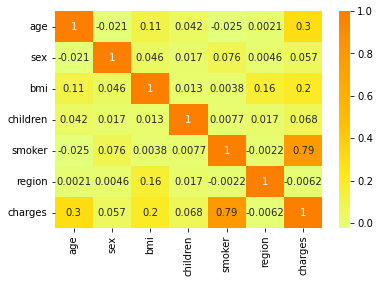

In [7]:
# Correlation between variables 
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

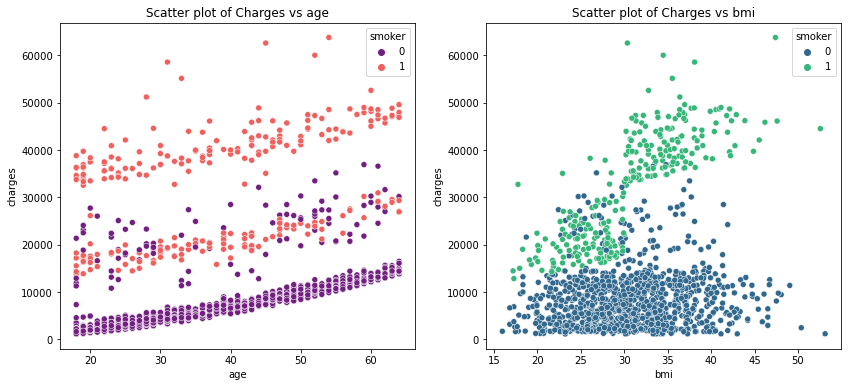

In [8]:
# Plotting Y of X
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')


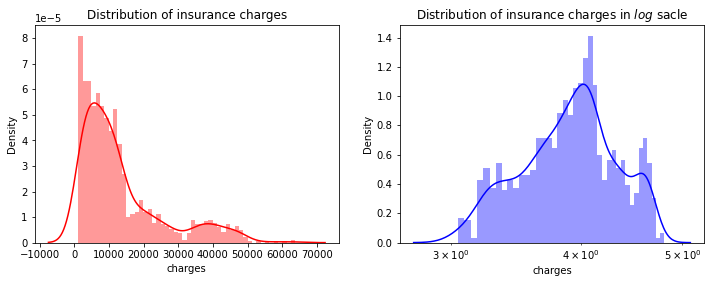

In [9]:
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

The left plot shows that log(charges) looks like the normal distribution => we will be applying log fo further analysis (not in this model)

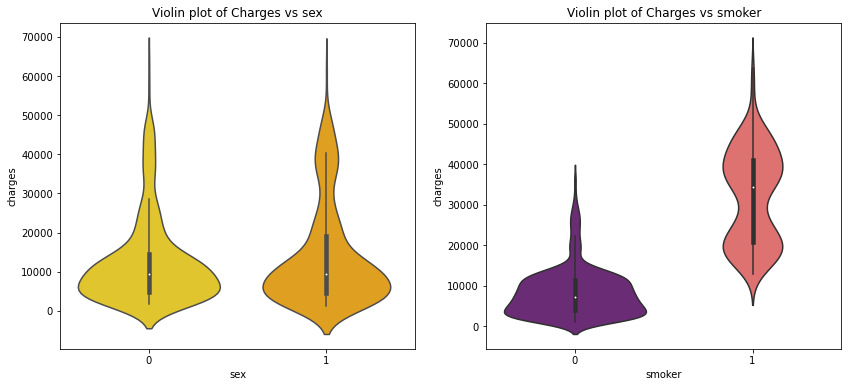

In [10]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

## Features enginnering

- In this dataset there are no correlation between variables => We keep all the features
- Advices to choose the right features :
    - Check the correlation between the variables 
    - Eliminate the variables that doesn't impact the output => Discuss with an expert on the domain 

In [11]:
# We are keeping all the featuers
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Transformation of the dataset 
There are many transformations that can be applied on the Input and the output variables :
- **Input** (X):  
    - Normalization (Max-Min , Z-score, log...) 
    - Encoding (One-hot encoding, label encoding...)
- **Output**(Y): 
    - Transformation using the log (for the normal distribution...)

In [12]:
# Splitting to X and Y
df_Y = df[['charges']] #Output
df_X = df[['age','sex','bmi','children','smoker','region']]

In [13]:
df_Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [14]:
df_X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [15]:
# Input : Z-score normalization 
scaler = StandardScaler()
# Here in the model builder we are scaling so no need to scale here 
X = scaler.fit_transform(df_X)
X = df_X.to_numpy()
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [17]:
# Output 
Y = np.log(df_Y.to_numpy()) # Log for a better distribution 
Y

array([[ 9.73417643],
       [ 7.45330245],
       [ 8.40053847],
       ...,
       [ 7.39623314],
       [ 7.60486709],
       [10.27991376]])

## Splitting the dataset

In [18]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X, Y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

In [19]:
print(f"Size of the training set {x_train.shape}")
print(f"Size of the cv set {x_cv.shape}")
print(f"Size of the test set {x_test.shape}")

Size of the training set (802, 6)
Size of the cv set (268, 6)
Size of the test set (268, 6)


## Training and selecting multiple models
The model is ready for the training 

### Linear regression
Here we are training two models (with and without regularization )

In [20]:
d = 1
lambda_ =0.001 #Regularization parameters


#Training the model without the regularization 
simple_linear_model = LinearRegression() #Without thr regularization 
simple_linear_model.fit(x_train,y_train)

#Model with regularization (Ridge)
ridge_linear_model = Ridge(alpha=lambda_) #With regularization
ridge_linear_model.fit(x_train,y_train)

#? Error for the two models 
# Making predictions 
y_train_hat_simple = simple_linear_model.predict(x_train)
y_train_hat_ridge = ridge_linear_model.predict(x_train)

#Computing the MSE (doesn't divide by 2 (average))
mse_train_simple = mean_squared_error(y_train,y_train_hat_simple) /2
mse_train_ridge = mean_squared_error(y_train,y_train_hat_ridge) /2

#Printing the results 
print(f"MSE ridge : {mse_train_ridge}")
print(f"MSE ridge : {mse_train_simple}")


MSE ridge : 0.09678552981008127
MSE ridge : 0.09678552979887423


In [21]:
# Making predictions 
y_cv_hat_simple = simple_linear_model.predict(x_cv)
y_cv_hat_ridge = ridge_linear_model.predict(x_cv)

#Computing the MSE (doesn't divide by 2 (average))
mse_cv_simple = mean_squared_error(y_cv,y_cv_hat_simple)
mse_cv_ridge = mean_squared_error(y_cv,y_cv_hat_ridge)

#Printing the results 
print(f"MSE ridge : {mse_cv_ridge}")
print(f"MSE ridge : {mse_cv_simple}")

MSE ridge : 0.21979023039315307
MSE ridge : 0.21978997151493088


### On test set
Computing the MSE on the test set tell us how well the model is generelizing 

In [22]:
# Making predictions 
y_test_hat_simple = simple_linear_model.predict(x_test)
y_test_hat_ridge = ridge_linear_model.predict(x_test)

#Computing the MSE (doesn't divide by 2 (average))
mse_test_simple = mean_squared_error(y_test,y_test_hat_simple)
mse_test_ridge = mean_squared_error(y_test,y_test_hat_ridge)

#Printing the results 
print(f"MSE ridge : {mse_test_ridge}")
print(f"MSE ridge : {mse_test_simple}")

MSE ridge : 0.186190175909437
MSE ridge : 0.1861899998364362


### Regression with multiple degrees

In [23]:
# This function build a Linear regression model
# Creates a pipeline X => Poly => Scaler => Model 
def build_model(x_train,y_train,degree=1,lambda_ = 0.0,with_bias=True):
    
    # Adding polynomial features
    poly = PolynomialFeatures(degree,include_bias=with_bias)
    x_train_mapped =  poly.fit_transform(x_train)

    # Scaler for the features
    scaler = StandardScaler()
    x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)

    # Regression model 
    model = Ridge(alpha=lambda_)
    model.fit(x_train_mapped_scaled,y_train)

    #Making predictions 
    y_train_hat = model.predict(x_train_mapped_scaled) 

    #Computing the error : MSE
    mse = mean_squared_error(y_train_hat,y_train) / 2

    # Making a pipeline fot simple computing , to make predictions we use regression.predict(input) (input must be same scale as x_train) 
    regression = make_pipeline(poly,scaler,model)
    
    # Returning the results 
    return regression,poly,scaler,model,mse


In [24]:
# Testing the model builder 
degree=2
regression,poly,scaler,model,mse = build_model(x_train,y_train,degree)

# Prediction on the trainning set
y_train_hat = regression.predict(x_train)
mse_train = mean_squared_error(y_train_hat,y_train) /2 
print(f"MSE(Train) = {mse_train}")

# prediciton on the cross-validation set
y_cv_hat = regression.predict(x_cv)
mse_cv = mean_squared_error(y_cv_hat,y_cv) /2 
print(f"MSE(CV) = {mse_cv}")

# Prediction on the test set
y_test_hat = regression.predict(x_test)
mse_test = mean_squared_error(y_test_hat,y_test) /2 
print(f"MSE(Test) = {mse_test}")


MSE(Train) = 0.06614998463535941
MSE(CV) = 0.07908962541352112
MSE(Test) = 0.05879168644679154


## Picking the best model
To choose the best model we will build multiple models (with different values of the degree and lambda) and we'll use the cross-validation set to pick the best model

In [25]:
#Searching the best model
#This function explores multiple values of lambda and degree to find the best model
def explore_models(x_train,y_train,x_cv,y_cv,x_test,y_test,degree_values=[1],lambda_values=[0.0],with_bias=True,debug=False):
    
    if debug:
        print("Looking for the best model")
    
    # Parameters of the best model  
    opt_lambda = 0.0
    opt_degree = 0.0
    opt_cv_mse = math.inf 
    opt_train_mse = math.inf 
    opt_model_pipeline = None   

    # To store the history 
    history  = []

    # Exploration loop 
    for lambda_ in lambda_values:
        for degree in degree_values:
            # Building a model and training it on the train set
            regression,poly,scaler,model,mse_train = build_model(x_train,y_train,degree,lambda_,with_bias)   

            # Computing the MSE on the cross-validation set
            y_cv_hat = regression.predict(x_cv)
            mse_cv = mean_squared_error(y_cv_hat,y_cv) /2 

            # Testing if we found a better model
            if(mse_cv < opt_cv_mse):
                opt_lambda = lambda_
                opt_degree = degree
                opt_cv_mse = mse_cv
                opt_train_mse = mse_train
                opt_model_pipeline = regression

            # Storing the results 
            history.append([degree,lambda_,mse_cv,mse_train])

            #Printing the result on the screen
            if debug:
                print(f"(d,lambda) = ({degree},{lambda_}) : MSE(cv) = {mse_cv}  MSE(train) = {mse_train}")

    # The result on the test set for the best model
    y_test_hat = opt_model_pipeline.predict(x_test)
    mse_test = mean_squared_error(y_test_hat,y_test) /2 
    
    # Result of the research 
    if debug:
        print(f"Optimum combinaison (d,lambda) = ({opt_degree},{opt_lambda}),MSE(test) = {mse_test} MSE(cv) = {opt_cv_mse}  MSE(train) = {opt_train_mse} ")

    return opt_model_pipeline,history
    

In [26]:
#Defining the values of lambda and degrees that will be explored 
lambda_values = [0.05]
degree_values= [i for i in range(10)]

In [27]:
#Testing the function
opt_model_pipeline,history = explore_models(x_train,y_train,x_cv,y_cv,x_test,y_test,degree_values,lambda_values,with_bias=True,debug=True)

Looking for the best model
(d,lambda) = (0,0.05) : MSE(cv) = 0.42265031124249386  MSE(train) = 0.4221757420808034
(d,lambda) = (1,0.05) : MSE(cv) = 0.10989534129410707  MSE(train) = 0.09678553104773184
(d,lambda) = (2,0.05) : MSE(cv) = 0.07905274886358259  MSE(train) = 0.06615577152958708
(d,lambda) = (3,0.05) : MSE(cv) = 0.0823716999374538  MSE(train) = 0.062230927618190636
(d,lambda) = (4,0.05) : MSE(cv) = 0.0957231549591851  MSE(train) = 0.05789252629496252
(d,lambda) = (5,0.05) : MSE(cv) = 0.12404115341500184  MSE(train) = 0.0541659518016393
(d,lambda) = (6,0.05) : MSE(cv) = 0.27891099662305097  MSE(train) = 0.05175535852451436
(d,lambda) = (7,0.05) : MSE(cv) = 0.49237542944523144  MSE(train) = 0.04963773122225124
(d,lambda) = (8,0.05) : MSE(cv) = 1.3001707925808128  MSE(train) = 0.04751786286408428
(d,lambda) = (9,0.05) : MSE(cv) = 3.371101600657848  MSE(train) = 0.04560939810565824
Optimum combinaison (d,lambda) = (2,0.05),MSE(test) = 0.05884412506888815 MSE(cv) = 0.0790527488635

## Some Graphics 

Text(0.5, 1.0, 'MSE(train) = f(degree)')

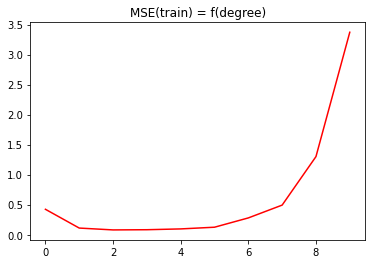

In [28]:
# Evolution of MSE in based of the degree 
history = np.array(history)
data_x = history[:,0]
data_y_1 = history[:,2] #MSE cv 
data_y_2 = history[:,3] #MSE train

plt.plot(data_x,data_y_1,color="red")
#plt.plot(data_x,data_y_2,color="blue")
plt.title('MSE(train) = f(degree)')


## Linear Regression model 
The model should be validated, the following paragraph is taken from Kaggel Linear Regression Tutorial  : 
In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no *Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

In [273]:
# Checking linearity 